In [2]:
# 1) Load the dataset into python environment
import pandas as pd
df = pd.read_csv("titanic_dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
#2) Do all the necessary pre-processing steps
X = df.iloc[:,[3,6]]
y = df.iloc[:,5]
x.head()

,Pclass,Sex
0,3,male
1,1,female
2,3,female
3,1,female
4,3,male


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=40)
X_train.head()

,Pclass,Sex
53,2,female
154,3,male
318,1,female
274,3,female
514,3,male


In [17]:
#creating dummy variables
dummies = []
cols = ['Pclass', 'Sex', 'Embarked']
for col in cols:
   dummies.append(pd.get_dummies(df[col]))

In [18]:
titanic_dummies = pd.concat(dummies, axis=1)

In [19]:
df = pd.concat((df,titanic_dummies), axis=1)
df = df.drop(['Pclass', 'Sex', 'Embarked'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Age          714 non-null    float64
 3   Ticket       891 non-null    object 
 4   Fare         891 non-null    float64
 5   Cabin        204 non-null    object 
 6   1            891 non-null    uint8  
 7   2            891 non-null    uint8  
 8   3            891 non-null    uint8  
 9   female       891 non-null    uint8  
 10  male         891 non-null    uint8  
 11  C            891 non-null    uint8  
 12  Q            891 non-null    uint8  
 13  S            891 non-null    uint8  
dtypes: float64(2), int64(2), object(2), uint8(8)
memory usage: 48.9+ KB


In [20]:
#taking care of missing data
df['Age'] = df['Age'].interpolate()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Age          891 non-null    float64
 3   Ticket       891 non-null    object 
 4   Fare         891 non-null    float64
 5   Cabin        204 non-null    object 
 6   1            891 non-null    uint8  
 7   2            891 non-null    uint8  
 8   3            891 non-null    uint8  
 9   female       891 non-null    uint8  
 10  male         891 non-null    uint8  
 11  C            891 non-null    uint8  
 12  Q            891 non-null    uint8  
 13  S            891 non-null    uint8  
dtypes: float64(2), int64(2), object(2), uint8(8)
memory usage: 48.9+ KB


In [23]:
#Converting the Data Frame to NumPy
import numpy as np
X = df.values
y = df['Survived'].values
X = np.delete(X, 1, axis=1)
print(x)

     Pclass     Sex
0         3    male
1         1  female
2         3  female
3         1  female
4         3    male
..      ...     ...
886       2    male
887       1  female
888       3  female
889       1    male
890       3    male

[891 rows x 2 columns]


In [35]:
#printing columnsnnames
print(df.columns)

Index(['PassengerId',    'Survived',         'Age',      'Ticket',
              'Fare',       'Cabin',             1,             2,
                   3,      'female',        'male',           'C',
                 'Q',           'S'],
      dtype='object')


In [4]:
#checking missing values for each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df = df.dropna(axis=0,how='all')
df = df.dropna(axis=1,how='all')
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df = pd.get_dummies(df)
df


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,889,0,3,NaN,1,2,23.4500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
889,890,1,1,26.0,0,0,30.0000,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
#splitting training testing datasets
predictorcolumns=['Pclass','Age','SibSp','Parch','Fare','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S']
targetcolumn='Survived'

X=df[predictorcolumns].values
y=df[targetcolumn].values

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [1]:
# 3) Create kNN and SVM models

#k-nearest neighbour

from sklearn.neighbors import KNeighborsClassifier


In [2]:
KNN = KNeighborsClassifier(n_neighbors=5,
                          weights='uniform',
                          algorithm='kd_tree',
                          leaf_size=30,
                          p=2,
                          metric='minkowski',
                          n_jobs=-1)

In [3]:
KNN

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1)

In [11]:
#SMV MODEL 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

ValueError: scatter requires an x and y column

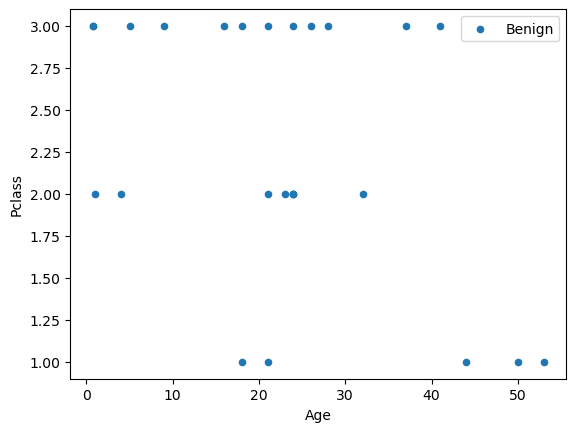

In [23]:
df = pd.read_csv("titanic_dataset.csv")
benign_df = df[df['SibSp']==2][0:200]
malignant_df = df[df['SibSp']==4][0:200]

axes = benign_df.plot(kind='scatter', x='Age', y='Pclass',label='Benign')

malignant_df.plot(kind='scatter', X='Age', y='Pclass', label='Benign')


In [24]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [32]:
df = df[pd.to_numeric(df['Name'],errors='coerce').notnull()]
df['Name']=df['Name'].astype('int')
df = df[pd.to_numeric(df['Sex'],errors='coerce').notnull()]
df['Sex']=df['Sex'].astype('int')
df = df[pd.to_numeric(df['Ticket'],errors='coerce').notnull()]
df['Ticket']=df['Ticket'].astype('int')
df = df[pd.to_numeric(df['Cabin'],errors='coerce').notnull()]
df['Cabin']=df['Cabin'].astype('int')
df = df[pd.to_numeric(df['Embarked'],errors='coerce').notnull()]
df['Embarked']=df['Embarked'].astype('int')
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name             int32
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket           int32
Fare           float64
Cabin            int32
Embarked         int32
dtype: object

In [35]:
df.columns
feauture_df= ['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin']
X = np.asarray(feauture_df)
y = np.asarray(df['Embarked'])
X[0:5]

array(['Survived', 'Pclass', 'Name', 'Sex', 'Age'], dtype='<U8')

In [41]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

ValueError: Found input variables with inconsistent numbers of samples: [10, 0]